# Cat and Dog Example

In [23]:
!wget --no-check-certificate https://www.microsoft.com/en-us/download/details.aspx?id=54765 -O /content/cats_and_dogs_filtered.zip #저장이름

--2026-02-12 10:05:08--  https://www.microsoft.com/en-us/download/details.aspx?id=54765
Resolving www.microsoft.com (www.microsoft.com)... 23.222.198.102, 2600:1408:5400:b8d::356e, 2600:1408:5400:b82::356e
Connecting to www.microsoft.com (www.microsoft.com)|23.222.198.102|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2026-02-12 10:05:08 ERROR 403: Forbidden.



In [27]:
!curl -o /tmp/cats_and_dogs_filtered.zip -k https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   298  100   298    0     0   5324      0 --:--:-- --:--:-- --:--:--  5418


In [28]:
# 압축풀기
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

BadZipFile: File is not a zip file

# Transfer Learning

In [29]:
# 필요한 라이브러리 import
import keras
from keras.applications.resnet50 import ResNet50           # ResNet50 모델
from keras.applications.resnet50 import preprocess_input, decode_predictions  # 전처리 및 예측 결과 디코딩
import numpy as np                                          # 수치 계산용 라이브러리
# ImageNet 데이터셋으로 사전 학습된 ResNet50 모델 불러오기
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


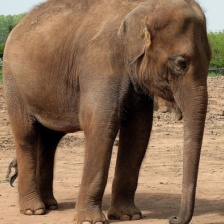

In [33]:
# 예측에 사용할 이미지 파일 경로 지정
img_path = '/elephant.jpg'
# 이미지를 불러오고 ResNet50 입력 크기인 (224, 224)로 리사이즈

img = keras.utils.load_img(img_path, target_size=(224, 224))
img

In [35]:
# 이미지를 NumPy 배열로 변환
x = keras.utils.img_to_array(img)
x

array([[[218., 231., 239.],
        [216., 229., 237.],
        [216., 229., 237.],
        ...,
        [222., 233., 237.],
        [221., 232., 236.],
        [221., 232., 236.]],

       [[216., 229., 235.],
        [215., 228., 234.],
        [215., 228., 234.],
        ...,
        [221., 232., 236.],
        [220., 231., 235.],
        [220., 231., 235.]],

       [[218., 229., 233.],
        [218., 229., 233.],
        [218., 229., 233.],
        ...,
        [221., 232., 236.],
        [221., 232., 236.],
        [221., 232., 236.]],

       ...,

       [[218., 178., 142.],
        [219., 179., 143.],
        [218., 175., 140.],
        ...,
        [190., 156., 128.],
        [181., 147., 119.],
        [184., 150., 122.]],

       [[218., 175., 140.],
        [225., 182., 147.],
        [226., 183., 148.],
        ...,
        [154., 123.,  95.],
        [149., 118.,  90.],
        [155., 124.,  96.]],

       [[220., 177., 142.],
        [220., 177., 142.],
        [221., 1

In [36]:
# 배열의 차원을 (1, 224, 224, 3)으로 확장 → 배치 크기 포함
x = np.expand_dims(x, axis=0)
x

array([[[[218., 231., 239.],
         [216., 229., 237.],
         [216., 229., 237.],
         ...,
         [222., 233., 237.],
         [221., 232., 236.],
         [221., 232., 236.]],

        [[216., 229., 235.],
         [215., 228., 234.],
         [215., 228., 234.],
         ...,
         [221., 232., 236.],
         [220., 231., 235.],
         [220., 231., 235.]],

        [[218., 229., 233.],
         [218., 229., 233.],
         [218., 229., 233.],
         ...,
         [221., 232., 236.],
         [221., 232., 236.],
         [221., 232., 236.]],

        ...,

        [[218., 178., 142.],
         [219., 179., 143.],
         [218., 175., 140.],
         ...,
         [190., 156., 128.],
         [181., 147., 119.],
         [184., 150., 122.]],

        [[218., 175., 140.],
         [225., 182., 147.],
         [226., 183., 148.],
         ...,
         [154., 123.,  95.],
         [149., 118.,  90.],
         [155., 124.,  96.]],

        [[220., 177., 142.],
       

In [37]:
# ResNet50에 맞는 전처리 수행 (픽셀 정규화 등)
x = preprocess_input(x)
x

array([[[[135.061    , 114.221    ,  94.32     ],
         [133.061    , 112.221    ,  92.32     ],
         [133.061    , 112.221    ,  92.32     ],
         ...,
         [133.061    , 116.221    ,  98.32     ],
         [132.061    , 115.221    ,  97.32     ],
         [132.061    , 115.221    ,  97.32     ]],

        [[131.061    , 112.221    ,  92.32     ],
         [130.061    , 111.221    ,  91.32     ],
         [130.061    , 111.221    ,  91.32     ],
         ...,
         [132.061    , 115.221    ,  97.32     ],
         [131.061    , 114.221    ,  96.32     ],
         [131.061    , 114.221    ,  96.32     ]],

        [[129.061    , 112.221    ,  94.32     ],
         [129.061    , 112.221    ,  94.32     ],
         [129.061    , 112.221    ,  94.32     ],
         ...,
         [132.061    , 115.221    ,  97.32     ],
         [132.061    , 115.221    ,  97.32     ],
         [132.061    , 115.221    ,  97.32     ]],

        ...,

        [[ 38.060997 ,  61.221    ,  9

In [42]:
# 모델에 입력 데이터를 넣고 예측 수행
preds = model.predict(x)
len(preds[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


1000

In [43]:
# 예측 결과를 해석 가능한 형태로 디코딩 (클래스 ID, 설명, 확률)
# top=3 → 확률이 높은 상위 3개의 클래스만 추출
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02504013', 'Indian_elephant', np.float32(0.9576462)), ('n01871265', 'tusker', np.float32(0.03569047)), ('n02504458', 'African_elephant', np.float32(0.0066630873))]


In [ ]:

# 예시 출력:
# Predicted: [('n02504013', 'Indian_elephant', 0.82658225),
#             ('n01871265', 'tusker', 0.1122357),
#             ('n02504458', 'African_elephant', 0.061040461)]